In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
d0 = pd.read_csv('./mnist_train.csv')
print(d0.head(5))

l=d0['label']

d=d0.drop("label",axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [17]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


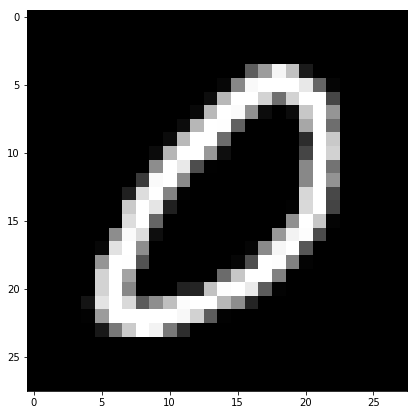

0


In [18]:
#diplay or plot a number

plt.figure(figsize=(7,7))
idx = 404

grid_data = d.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show()

print(l[idx])

In [34]:
labels = l.head(42000)
data = d.head(420000)

data.shape

(42000, 784)

In [35]:
from sklearn.preprocessing import StandardScaler

#data pre-processing: standardized data
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(42000, 784)


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [36]:
#find all co-varince matrix which is : A^T * A
sample_data = standardized_data

#matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data )

print( "The shape of varince matrix = ",covar_matrix.shape)

The shape of varince matrix =  (784, 784)


In [37]:
#finding the top two eigen-values and corresponding eigen-vectors
#for projecting onto 2-Dim space
from scipy.linalg import eigh

#the parameter 'eigvals' is defined (low to high value)
#eigh function will return the eigen values in asending order
#this code generates only the top 2 (782,783 eigenvalues)
values,vectors = eigh(covar_matrix,eigvals=(782,783))

print("shape of eigen vectors = ",vectors.shape)

vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)

shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [38]:
new_coordinates = np.matmul(vectors, sample_data.T)

print(" resultant new data points' shape ",vectors.shape," ",sample_data.shape," = ",new_coordinates.shape)

 resultant new data points' shape  (2, 784)   (42000, 784)  =  (2, 42000)


In [39]:
#appending label to 2d projected data
new_coordinates = np.vstack((new_coordinates,labels)).T

#creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates,columns=("1st_principal","2nd_principal","labels"))
print(dataframe.head())

   1st_principal  2nd_principal  labels
0      -5.226445      -5.140478     1.0
1       6.032996      19.292332     0.0
2      -1.705813      -7.644503     1.0
3       5.836139      -0.474207     4.0
4       6.024818      26.559574     0.0


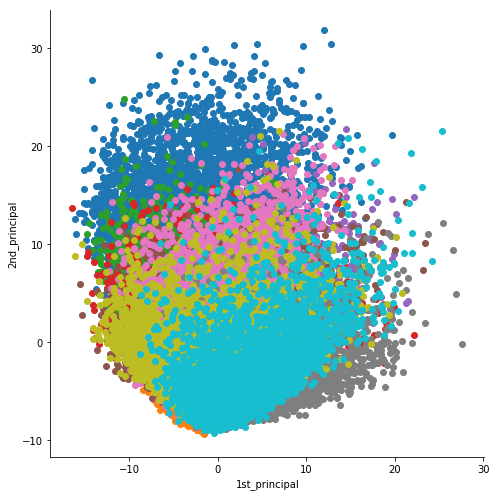

In [45]:
#plotting the 2D data points with seaborn

import seaborn as sns
sns.FacetGrid(dataframe, hue="labels",height=7).map(plt.scatter,'1st_principal','2nd_principal')
plt.show()

In [47]:
#PCA using Scikit-Learn

In [48]:
from sklearn import decomposition
pca = decomposition.PCA()

In [56]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

pca_data.shape

(42000, 2)

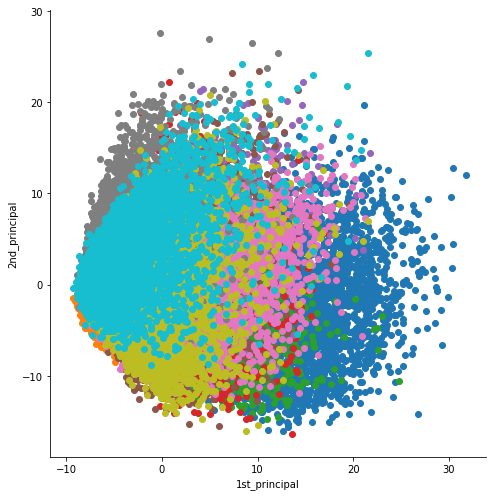

In [58]:
pca_data = np.vstack((pca_data.T,labels)).T

pca_df.shape

pca_df = pd.DataFrame(data=pca_data,columns=("1st_principal","2nd_principal","labels"))

sns.FacetGrid(pca_df, hue="labels",height=7).map(plt.scatter,'1st_principal','2nd_principal')
plt.show()